<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Aprendizado não Supervisionado: Clustering**
---

Nas próximas duas aulas você vai aprender:

*   O que é o aprendizado não supervisionado
*   O que é como fazer clusterizações de dados com os algoritmos KMédias e de Clusterização Hierárquica
*   Como empregar métricas qualidade dos aglomerados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

O objetivo do aprendizado supervisionado é basicamente de mapear entradas e saídas com base em um conjunto de dados de exemplo, o conjunto de treinamento ou supervisor. No aprendizado não supervisionado, não existe um conjunto de entradas e saídas e há apenas os dados de entrada o que, por simplicidade costumamos dizer apenas *não tem um conjunto de treinamento*. Assim, o objetivo do aprendizado não supervisionado, é o de descobrir padrões ou uniformidades nos dados. O que é útil para uma série de tarefas diferentes das que vimos até aqui, como a classificação e a regressão. Aqui você aprender duas técnicas de *clustering*, se seguiremos na próxima trilha ainda com outros modelos não supervisionados como mineração de regras de associação.  







# Aprendizado Não Supervisionado

São muitas as situações em que não temos a possibilidade de termos dados de treinamento pré-rotulados. Apesar disso, queremos extrair conhecimentos úteis dos dados para a tomada de decisões e ações. É nesta situação que modelos de aprendizado não supervisionado são bastante úteis. Não havendo um conjunto de entradas e saídas, isto é um conjunto de treinamento, o objetivo do aprendizado não supervisionado, será o de descobrir padrões nos dados. O modelo ou algoritmo irá tentar aprender estruturas, relações e padrões latentes nos dados sem qualquer assistência ou supervisão.

Algoritmos de aprendizado não supervisionado normalmente incluem:

* Algoritmos de clusterização (ou agrupamento)
* Detecção de anomalias
* Redução de Dimensionalidade (ou Métodos de Variáveis Latentes)
* Regras de Associação
       
Os métodos de clusterização incluem clusterização hierárquica, k-médias que você aprenderá. Para detecção de anomalias há métodos como Fator Outlier Local e Floresta de Isolamento. A análise de componentes principais (PCA) e valor singular decomposição (SVD) são métodos empregados para redução de dimensionalidade e algoritmos *apriori* são aplicados para busca de regras de associação. Esses últimos métodos você estudará na próxima trilha.

Em todos esses casos há certamente padrões particulares nos dados que aparecem com mais frequência e outros menos, e queremos descobrir o que acontece e o que não acontece nos dados. Isso, em estatística, denominado de estimativa de densidade.

# Exemplos: Como aprender sem rótulos?

Depois de ter estudado modelos supervisionados parece estranho pensarmos em aprender ser rótulos. Mas na verdade essa é até uma forma talvez mais natural de aprendizado. Os exemplos a seguir ilustram dois tipos de aprendizado não supervisionado, a detecção de anomalias e a clusterização.

Você, mesmo sem ter quaisquer rótulos para os dados, pode apenas *vendo* as figuras identificar os pontos de anomalias e os clusters de dados sem qualquer informação adicional além das entradas.

In [ ]:
# you can skip this code!

df = pd.read_csv('https://raw.githubusercontent.com/anhnguyendepocen/Time-Series-Analysis-1/master/catfish.csv')
df.head()

# Simulando anomalias
df = df[ df.Date >= '2000-1-01' ]
df.at[ df[ df.Date == '2006-3-01' ].index[0] , 'Total' ] = df.at[ df[ df.Date == '2006-3-01' ].index[0] , 'Total' ] * 1.3
df.at[ df[ df.Date == '2010-2-01' ].index[0] , 'Total' ] = df.at[ df[ df.Date == '2006-2-01' ].index[0] , 'Total' ] * 0.3

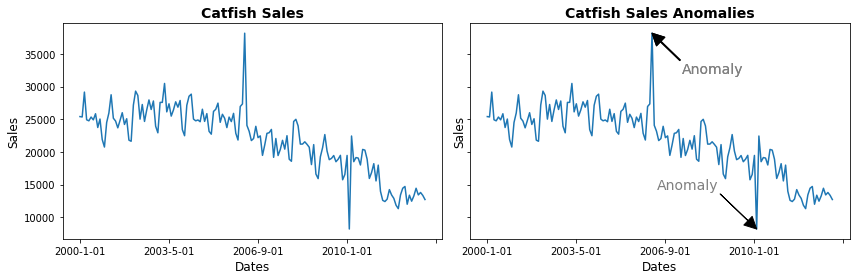

In [ ]:
# you can skip this code!

import matplotlib.ticker as ticker

f, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

for i in range(2):
  ax[i].plot(df.Date, df.Total)
  ax[i].set_title(['Catfish Sales', 'Catfish Sales Anomalies'][i], fontsize=14, weight='bold')
  ax[i].set_ylabel('Sales', fontsize=12)
  ax[i].set_xlabel('Dates', fontsize=12)
  ax[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

ax[1].annotate('Anomaly', ( df[ df.Date == '2006-3-01' ]['Date'], df[ df.Date == '2006-3-01' ]['Total']),
            xytext=(30, -40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=1))

ax[1].annotate('Anomaly', ( df[ df.Date == '2006-3-01' ]['Date'], df[ df.Date == '2006-3-01' ]['Total']),
            xytext=(30, -40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

ax[1].annotate('Anomaly', ( df[ df.Date == '2010-2-01' ]['Date'], df[ df.Date == '2010-2-01' ]['Total']),
            xytext=(-100, 40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.tight_layout()
plt.show()


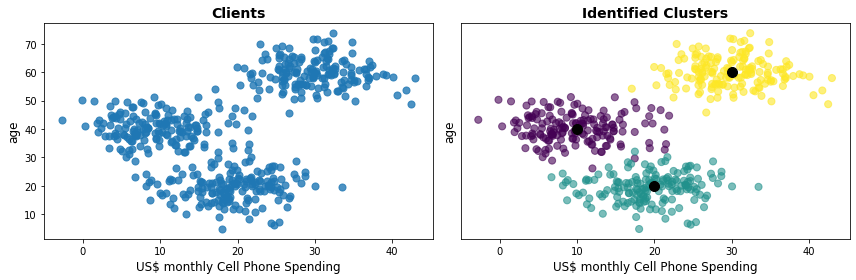

In [ ]:
# you can skip this code!

f = plt.figure(figsize=(12,4))

from sklearn.datasets import make_blobs
n_samples = 500
centers = [(10,40), (20,20), (30,60)]
X, y_true = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, cluster_std=5, random_state=0)

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
plt.title('Clients', fontsize=14, weight='bold')
plt.xlabel('US$ monthly Cell Phone Spending', fontsize=12)
plt.ylabel('age', fontsize=12)

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, c=y_true)
plt.title('Identified Clusters', fontsize=14, weight='bold')
plt.xlabel('US$ monthly Cell Phone Spending', fontsize=12)
plt.ylabel('age', fontsize=12)
plt.yticks([])
plt.scatter(10,40,c='k',s=100)
plt.scatter(20,20,c='k',s=100)
plt.scatter(30,60,c='k',s=100)

plt.tight_layout()
plt.show()

# Aprendizado Supervisionado *vs* Não Supervisionado

Além da presença ou não de dados rotulados e dos algoritmos é importante entender que enquanto os modelos supervisionados têm um caráter mais preditivo os modelos não supervisionados são modelos mais analíticos. Eles não retornam um valor ou uma classe para dados de teste ou novos dados, mas apresentam padrões comuns ou incomuns dos dados.

No exemplo acima de clusterização, a segmentação de clientes apenas apresenta grupos de clientes que são semelhantes entre si e se distinguem dos demais. Esses grupos formados podem ou não serem úteis a você, e você ainda precisará *entender* que tipo de clientes há em cada grupo, por exemplo olhando os valores médios de cada grupo, para definir, por exemplo, que tipo de produto ou campanha você direcionaria para cada segmento de clientes.
No caso da *anomalia*, o modelo apenas aponta dados que estão fora do padrão dos demais, mas cabe a você decidir se o que o algoritmo aponta é uma informação útil e se, de fato, há uma anomalia real. Você pode também pensar em um sistema de recomendação de produtos (por exemplo, com regras de associação do tipo *produtos normalmente comprados juntos*). O algoritmo produz diversas sugestões de produtos e talvez você queira analisar e *filtrar* as recomendações antes de enviá-las, por exemplo selecionando somente os produtos mais recentes ou os com maior valor.

Essa e outras diferenças dos aprendizados supervisionado e não supervisionado são sumarizadas na tabela a seguir.


| Característica             | Aprendizado Supervisionado                                                                                       | Aprendizado não Supervisionado                                                                         |
|----------------------------|------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| Conjunto de Treinamento    | Dados rotulados, entradas e saídas                                                                               | Ausência de um conjunto de treinamento, há apenas dados não rotulados                                  |
| Tipo de Tarefa             | Preditivo                                                                                                        | Analítico                                                                                              |
| Tarefas                    | Regressão e Classificação                                                                                        | Clusterização, detecção de anomalias, redução de dimensionalidade e mineração de regras de associação  |
| Algoritmos                 | Regressão linear e logística, K-vizinhos mais próximos, Árvores de Decisão, SVM, Random Forest, Naive Bayes etc. | Clusterização Hierárquica, Kmédias, Floresta de Isolamento, PCA, SVD, apriori etc.                     |
| Complexidade computacional | Em geral mais simples                                                                                            | Em geral computacionalmente mais complexo                                                              |

# Clustering

Uma das tarefas mais comuns de aprendizado não supervisionado é o clustering, ou clusterização.

No clustering o objetivo é buscar agrupamentos, clusters ou ainda aglomerados, dos dados. Um grupo é um conjunto de elementos dos que se assemelham ao mesmo tempo que se distinguem dos demais elementos, e pode haver apenas um grupo (ou como costumamos falar informalmente *nenhum* grupo) ou vários. Não sabemos isso de antemão como, por exemplo, na classificação em que sabemos de antemão as classes dos dados.   

A segmentação de clientes, e também de produtos, é um exemplo comum de aplicação de clusterização.  Uma empresa pode estar interessada em descobrir a distribuição do perfil de seus clientes para descobrir que tipo de clientes aparecem regularmente ou direcionar uma campanha. Um modelo de cluster distribui clientes semelhantes em seus atributos a um mesmo grupo (cluster), fornecendo agrupamentos *naturais* dos clientes. Uma vez descobertos esses agrupamentos, a empresa pode analisar esses grupos e escolher estratégias relativas a serviços e produtos específicos para cada grupo. Algo comum na  gestão de relacionamento com clientes.





# Algoritmos de Clusterização

O que diferencia um bom clustering é o quanto os dados são  divididos em clusters ou grupos coerentes. Isso requer alguma forma de avaliar a semelhança ou, como é geralmente mais apropriado, a diferença ou distância entre os dados. Se os atributos  são numéricos, uma medida de distância como a distância euclidiana pode ser empregada e é a mais comumente utilizada. Mas, como você aprendeu na trilha anterior, existem vários tipos de função distância e se seu objetivo é encontrar grupos de documentos uma distância cosseno pode ser mais apropriada.

Existem diferentes técnicas de clusterização que podemos classificar da seguinte forma:

* Abordagens baseadas em centroid, como Kmeans e Kmedoids
* Abordagens hierárquicas de agrupamento, como clusterização divisiva e de aglomeração
* Abordagens de clustering baseadas em distribuição, como modelos de mistura gaussiana
* Técnicas baseadas em densidade, como dbscan

Aqui veremos apenas os dois primeiros.

Assim como os modelos não supervisionados é importante termos métricas que avaliem os modelos. Na ausência de dados rotulados, não podemos empregar um conjunto de teste da mesma forma que fizemos na classificação ou regressão, e veremos aqui algumas técnicas para avaliar a qualidade dos agrupamentos.


# Cuidado: Clusterização $\not=$ Classificação

Um problema bastante comum não sabermos diferenciar claramente Clusterização e Classificação. Vale a pena, então, analisarmos esse ponto. Considere o nosso exemplo de clientes de um serviço de telefonia móvel. Eles estão segmentados em três grupos e ainda podemos supor que esses grupos são obtidos também com base em outros atributos como sexo, escolaridade , tipo de pagamento preferencial (à vista ou a prazo), bairro em que reside, profissão. Ao mesmo tempo você pode ter informação de *churn* desses clientes, abandono do cliente que *migra* para outra operadora. Se você estiver interessado prever clientes com maior propensão de *churn* você estará pensando em um problema de classificação. Os clusters não revelam isso. Eles procuram revelar um padrão de semelhança dos clientes independentemente de serem clientes propensos ou não a *churn*. Note que são duas classes (churn e not churn) pre-definidas, enquanto os grupos *descobertos* foram 3. Ao  analisar  esses grupos eventualmente podemos encontrar que o *perfil médio* desses clientes são, por exemplo,  *clientes novos*, *clientes antigos com planos individuais* e *clientes antigos com planos familiares*, e que nada tem a ver com serem propensos ou não a churn, e você provalmente só faria clusterização de clientes ativos (not churn) pois os dados históricos não têm interesse para a clusterização (outra diferença importante).



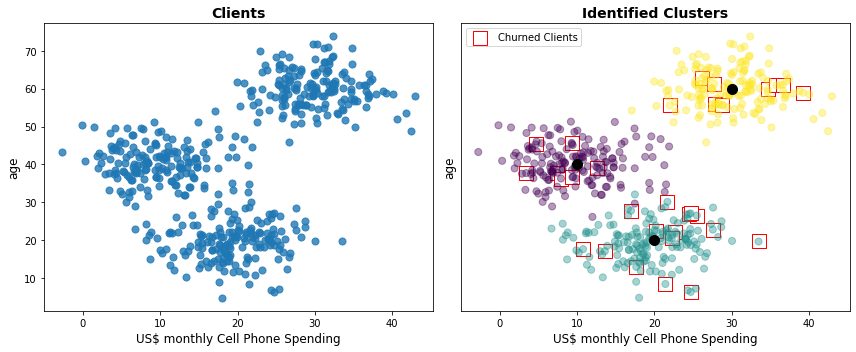

In [ ]:
# you can skip this code!

f = plt.figure(figsize=(12,5))

from sklearn.datasets import make_blobs
n_samples = 500
centers = [(10,40), (20,20), (30,60)]
X, y_true = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, cluster_std=5, random_state=0)

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
plt.title('Clients', fontsize=14, weight='bold')
plt.xlabel('US$ monthly Cell Phone Spending', fontsize=12)
plt.ylabel('age', fontsize=12)

plt.subplot(1,2,2)

np.random.seed(1984)
churn = np.random.random_sample(size=n_samples) > 0.95
plt.scatter(X[churn, 0], X[churn, 1], s=180, c='w', edgecolors='r', marker='s', label='Churned Clients')

plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.4, c=y_true)
plt.title('Identified Clusters', fontsize=14, weight='bold')
plt.xlabel('US$ monthly Cell Phone Spending', fontsize=12)
plt.ylabel('age', fontsize=12)
plt.yticks([])
plt.scatter(10,40,c='k',s=100)
plt.scatter(20,20,c='k',s=100)
plt.scatter(30,60,c='k',s=100)

plt.legend()

plt.tight_layout()
plt.show()

# Algoritmo Kmédias

O Kmédias sistematiza a forma que identificamos grupos de dados. Grupos precisam ter seus elementos mais concentrados, mais próximos, mas também precisam estar distantes de outros grupos dos quais se diferenciam.

A ideia básica por trás do agrupamento Kmeans consiste em definir clusters de forma que a variação total dentro do cluster (*within-cluster-variation*) seja mínima. Existem vários algoritmos k-means disponíveis e o algoritmo padrão  define a variação total dentro do cluster como a soma das distâncias quadradas entre os itens e o centróide correspondente:

$$ Within(C_k) = \sum_{x_i \in C_k} || x_i - \mu_k ||^2$$

onde

$x_i$ é um ponto de dados pertencente ao cluster $C_k$
$\mu_k$ é *centróide*, o ponto médio dos elementos que pertencem ao cluster $C_k$

A variação total dos clusters é desse modo:      

$$  Within(C_k) = \sum_{k=1}^{k} W(C_k) = \sum_{k=1}^{k} \sum_{x_i \in C_k} || x_i - \mu_k ||^2$$

Queremos então minimizar a variação total intra-clusters:  

$$  \text{arg min}_C( Within(C_k) ) = \text{arg min}_C( \sum_{k=1}^{k} \sum_{x_i \in C_k} || x_i - \mu_k ||^2 )$$  




## Pseudo Código Kmédias

O Kmédias é então um problema de otimização e isso é feito de modo iterativo, com aproximações sucessivas dos centróides, escolhidos inicialmente de forma aleatória, aos centróides que minimizam a variação intra-clusters.


In [ ]:
%%script false

def kmeans(data, k):

  Selecione k pontos aleatoriamente como centros de cada k cluster (centróides)
  convergiu = False

  while not convergiu:

    Atribua cada elemento ao centríde mais próximo

    Calcule os novos centróide a partir da média de todos os elementos de cada cluster

    if centróides atuais == centróides anteriores:
      convergiu = True

return

### Exemplo 1D

O exemplo abaixo (adaptado livremente de Sayad, Saed (2021)) exibe a formação de 2 clusters passo a passo para dados em uma única dimensão. Você pode pensar nesses dados como as idades de um grupo de visitantes de um museu e você deseja encontrar em dois grupos *ótimos* de visita (*clusters*) para dividir entre dois monitores do museu.

In [ ]:
# you can skip this code!

from sklearn.cluster import KMeans

# Linear
#-------------------------------------------------------------------------------
from scipy.spatial import distance
def kmeansL(X,k=2,max_iterations=100,pos=[2,8]):
    f = plt.figure(figsize=(12, 5))
    plt.yticks([])
    plt.ylim([-2.5,0.5])

    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.array(pos) # np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    print('\nCentroids, iteração  0  : (', np.round(centroids[0][0],1) , ',', np.round(centroids[1][0],1) , ')')
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    zeros = np.full((len(X)), 0, dtype=int)
    sns.scatterplot(X[:,0],zeros, hue=P,legend=None,marker='o',s=50)
    sns.scatterplot(centroids[:,0],zeros[0:2], legend=None,color='black',s=200)
    plt.text(centroids[0,0],zeros[0:1]-0.2,'C1 =' + str(np.round(centroids[0,0],1)))
    plt.text(centroids[1,0],zeros[0:1]-0.2,'C2 =' + str(np.round(centroids[1,0],1)))
    plt.text(15,zeros[0:1]+0.2,'i = ' + str(0))
    for j in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        print('\nCentroids, iteração ', j+1, ' : (', np.round(centroids[0][0],1) , ',', np.round(centroids[1][0],1) , ')')
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
        zeros = np.full((len(X)), -(j+1) , dtype=int)
        sns.scatterplot(X[:,0],zeros, hue=P,legend=None,marker='o',s=50)
        sns.scatterplot(centroids[:,0],zeros[0:2], legend=None,color='black',s=200)
        plt.text(centroids[0,0],zeros[0:1]-0.2,'C1 =' + str(np.round(centroids[0,0],1)))
        plt.text(centroids[1,0],zeros[0:1]-0.2,'C2 =' + str(np.round(centroids[1,0],1)))
        plt.text(15,zeros[0:1]+0.2,'i = ' + str(j+1))

    print()
    plt.show()
    return P # , X, centroids


Centroids, iteração  0  : ( 16 , 22 )

Centroids, iteração  1  : ( 16.8 , 38.7 )

Centroids, iteração  2  : ( 18.6 , 45.9 )

Centroids, iteração  3  : ( 19.5 , 47.9 )



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

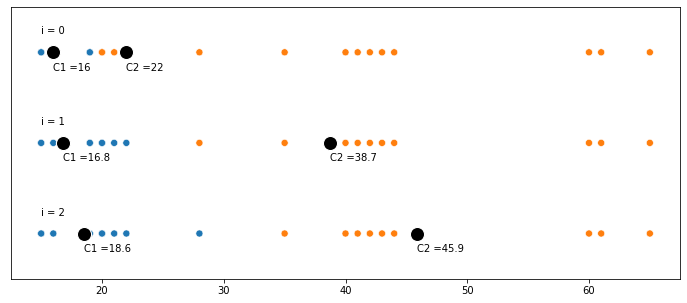


Clusteriação Final:
------------------------------------------------------------



,Age,cluster
0,15,Blue
1,15,Blue
2,16,Blue
3,19,Blue
4,19,Blue
5,20,Blue
6,20,Blue
7,21,Blue
8,22,Blue
9,28,Blue


In [ ]:
X = pd.DataFrame({'Age':[15,15,16,19,19,20,20,21,22,28,35,40,41,42,43,44,60,61,65]})

clusters = kmeansL(X,k=2,pos=[2,8])

X['cluster'] = ['Orange' if x == True else 'Blue' for x in clusters]
print('\nClusteriação Final:')
print(60*'-' + '\n')
display(X)

### Exemplo 2D

O mesmo procedimento pode ser adotado para duas ou mais dimensões embora a visualização, sem o recurso de técnicas mais elaboradas de redução de dimensões, está limitada de modo prático a duas dimensões e você acompanhar as iterações do algoritmo neste caso no exemplo abaixo. As linhas em vermelho mostram a trajetória dos centróides ao longo das iterações.

In [ ]:
# you can skip this code!

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    j=0

    old_centers = []
    centers_started = centers

    labels = pairwise_distances_argmin(X, centers)

    while True:
        f = plt.figure(figsize=(8, 5.5))

        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.60);
        plt.scatter(centers_started[:, 0], centers_started[:, 1], c='red', s=100, alpha=0.5);
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.9);

        if len(old_centers) >= 1:
          for m in range(n_clusters):
            for k in range(len(old_centers) - 1):
              plt.plot([ old_centers[k][m, 0], old_centers[k+1][m, 0] ],
                       [ old_centers[k][m, 1], old_centers[k+1][m, 1] ],
                       c='r', marker='+', lw=2, linestyle='dotted' )
            last = len(old_centers) - 1
            plt.plot([ old_centers[last][m, 0], centers[m, 0] ],
                     [ old_centers[last][m, 1], centers[m, 1] ],
                     c='r', marker='+', lw=2, linestyle='dotted' )
        plt.text(centers[0, 0]-0.3, centers[0, 1]+0.3, 'C1', fontsize=16)
        plt.text(centers[1, 0]-0.3, centers[1, 1]+0.3, 'C2', fontsize=16)
        plt.text(centers[2, 0]-0.3, centers[2, 1]+0.3, 'C3', fontsize=16)
        plt.text(centers[3, 0]-0.3, centers[3, 1]+0.3, 'C4', fontsize=16)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break

        old_centers.append(centers)

        centers = new_centers

        plt.title('Kmeans, Iteração i= ' + str(j), fontsize=14, weight='bold')
        j=j + 1

        plt.show()
    return centers, labels



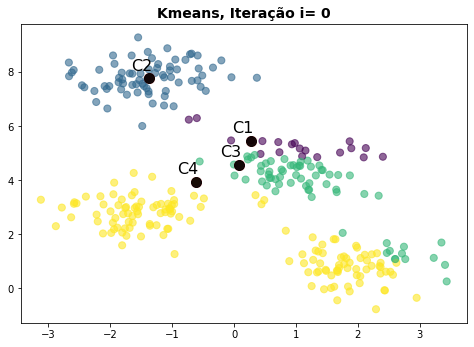

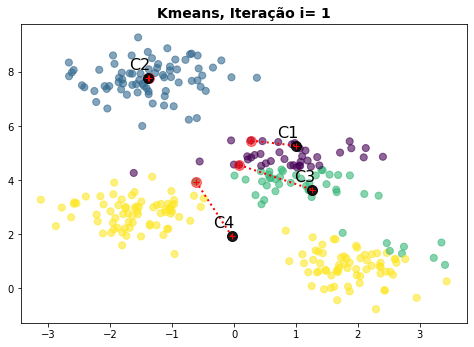

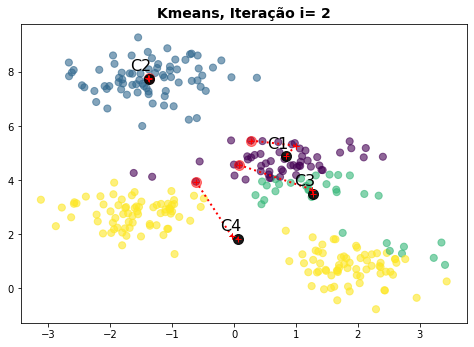

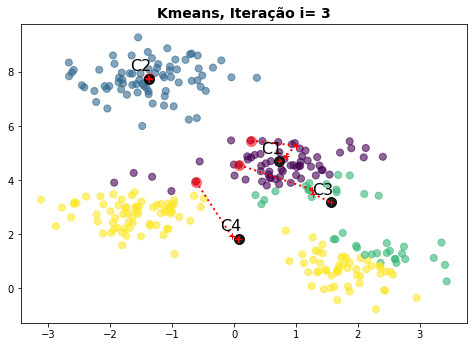

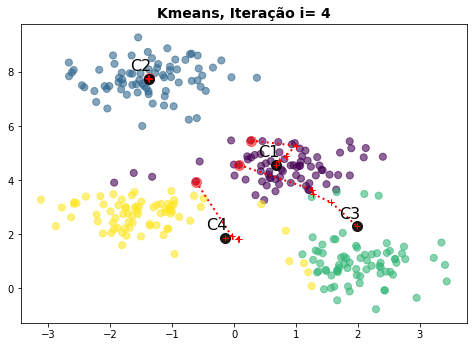

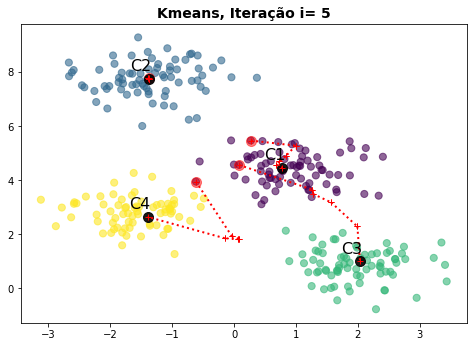

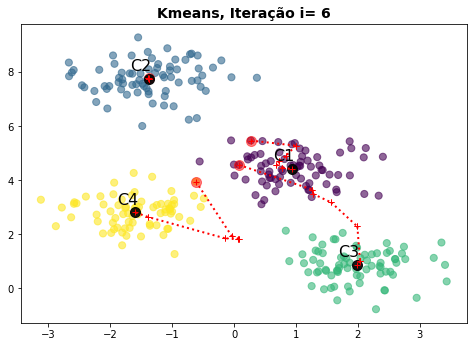

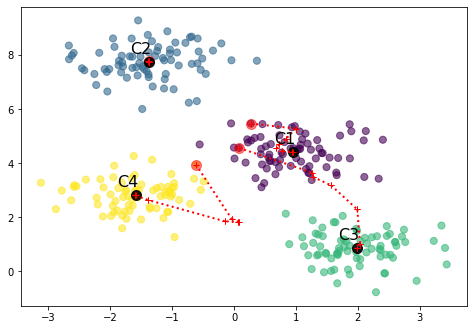

In [ ]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
centers, labels = find_clusters(X, 4)

# KMeans com `Scikit-learn`

A estrutura de uso de estimadores não supervisionados com o `scikit-learn` segue bastante semelhante a que já empregamos para modelos de classificação e regressão. Vamos aplicá-la a um conjunto de dados de brinquedo antes de prosseguirmos.

In [ ]:
# Prepara os dados de entrada do estimador
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Configura e instancia o estimador
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X)

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[2 0 1 0 2 2 3 1 0 0 3 0 1 0 2 1 1 2 3 3 2 2 1 3 3 1 2 1 3 1 0 0 1 0 0 0 0
 0 3 2 1 3 1 1 3 3 0 3 0 2 3 2 0 2 2 3 0 3 0 2 0 1 0 3 3 3 0 2 0 3 1 3 0 3
 3 0 3 1 2 0 2 1 2 2 0 1 2 1 0 0 1 2 0 3 3 1 2 2 1 3 0 2 0 2 1 2 2 1 0 1 3
 3 2 0 2 1 0 2 2 1 3 2 3 2 2 2 2 3 2 3 0 3 3 2 0 3 3 0 1 0 0 3 1 3 1 3 0 1
 0 0 0 1 0 1 2 3 0 3 2 1 0 1 1 2 1 3 3 1 2 1 1 0 2 1 3 0 2 2 1 3 2 1 3 3 1
 1 1 1 2 0 1 3 1 1 3 3 3 1 3 0 1 3 2 3 1 0 3 0 1 0 1 3 1 1 0 3 3 2 2 1 0 2
 2 3 2 3 1 0 0 1 1 0 1 2 3 1 2 3 0 3 2 1 2 0 0 0 0 3 3 0 1 3 2 1 3 3 3 2 2
 0 1 1 3 2 0 3 1 0 1 2 2 3 3 1 2 2 2 1 0 0 2 2 1 2 2 2 0 3 0 1 2 2 0 0 0 2
 2 1 0 3]
[[-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]


Sendo nosso exemplo em duas dimensões podemos observar diretamente os clusters formados embora, para dimensões maiores isso podem exigir outro tipo de tratamento.

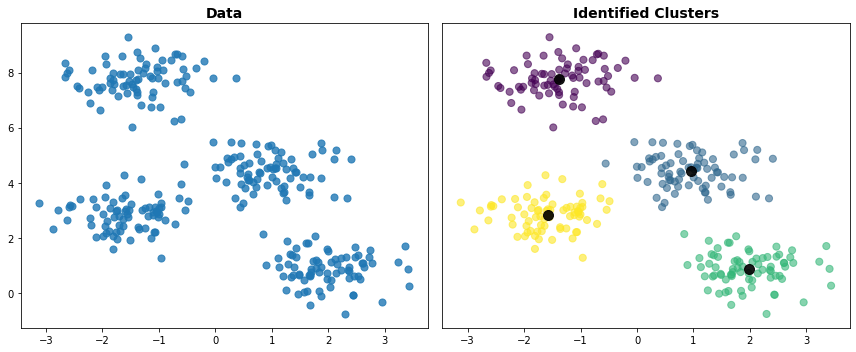

In [ ]:
f = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
plt.title('Data', fontsize=14, weight='bold')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, c=labels)
plt.title('Identified Clusters', fontsize=14, weight='bold')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.9);
plt.yticks([])

plt.tight_layout()
plt.show()



# CASO: Segmentando Estados para Políticas e Campanhas de não Violência

Fonte: https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv

Este conjunto de dados contém estatísticas, em prisões por 100.000 residentes por agressão, assassinato e estupro em cada um dos 50 estados dos EUA em 1973. Também é fornecida a porcentagem da população que vive em áreas urbanas.


**USArests**

- `Murder`	Assassinato, Prisões por homicídio (por 100.000 habitantes)

- `Assalt`	Assalto, Prisões por agressão (por 100.000 habitantes)

- `Urbanpop`	Porcentagem da população urbana

- `Rape`	Estupro, Prisões por estupro (por 100.000 habitantes)

Note que não temos nenhum rótulo `y` nos dados e nosso objetivo é segmentar esses estados com base nesses dados indicadores de violência e população urbana para, por exemplo, definirem-se políticas públicas adequadas para cada grupo.


## Preparação dos Dados


In [ ]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Os dados encontram-se em escalas diferentes. O Kmeans emprega distância como medida de similaridade e é, portanto, sensível à normalização dos dados. Vamos assim normalizar os dados e empregaremos aqui o método `StandardScaler` que normaliza os dados com média zero e desvio padrão $1$ ($z$-score).

$$ z_i = \frac{x_i - \mu}{\sigma(x)} $$

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293]])

## Clustering `['Murder','UrbanPop']`

Vamos inicialmente aplicar nosso modelo de código para a clusterização levando em conta apenas 2 atributos e, assim, podermos visualizar os grupos de dados. Vamos buscar agrupar os dados em 4 grupos de dados.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Murder', 'UrbanPop']])
X = scaler.transform(df[['Murder', 'UrbanPop']])

# Configura e instancia o estimador
clf = KMeans(n_clusters = 4 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 2 1 2 2 0 0 2 1 0 3 2 0 3 0 1 1 3 2 0 2 0 1 2 3 0 2 3 2 2 2 1 3 0 0 0
 0 0 1 3 1 2 0 3 0 0 3 0 0]
[[-0.61181872  0.41593144]
 [ 1.23662525 -0.87513091]
 [ 0.65574179  0.95007158]
 [-1.0975732  -1.23182081]]


Vamos adicionar os valores obtidos a um novo atributo `Cluster` nos dados.

In [ ]:
df['Cluster'] = labels
df.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,1


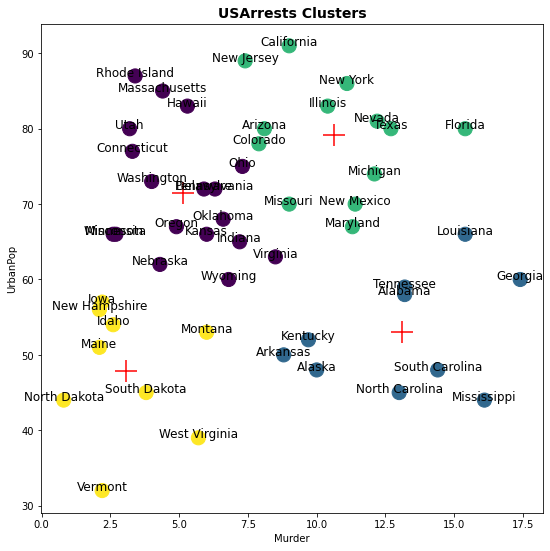

In [ ]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = real_centroids[: , 0] , y =  real_centroids[: , 1] , s = 500 , c = 'red' , marker='+')

for line in range(0,df.shape[0]):
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],
           horizontalalignment='center',
           size='large',
           color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

### Qual o número ideal de Clusters? Método do Cotovelo

Antes de prosseguirmos você deve ter notado que até aqui escolhemos arbitrariamente o número de clusters. Como determinar o número ideal de Clusters?  

Um primeiro método é conhecido como método do cotovelo (*elbow method*).
A inércia mede o quanto um conjunto de dados foi agrupado pelo KMédias, ela é a própria variação total dos clusters que vimos acima $Within(C_k)$. Mas um bom modelo deve ter uma baixa inércia, mas também um baixo número de clusters $k$. Desse modo precisamos buscar uma compensação porque a medida de o número de clusters aumenta, a inércia diminui. A ideia, então, é buscar o ponto onde a diminuição da inércia começa a diminuir, o *cotovelo* da curva.


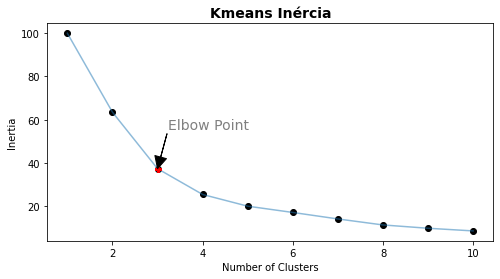

In [ ]:
def inercia(X=X, kmin=1, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1984)
      clf.fit(X)
      inertia.append(clf.inertia_)

  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(1 , 11) , inertia , 'ko')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,1,10)
# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[2]),
            xytext=(10, 40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()

Essa é uma técnica visual e aproximada. De qualquer modo podemos agora reproduzir a clusterização com o número ideal de cluster, $k=3$.

### Método da Silhueta

Outro método que pode ser empregado é o método de cálculo da silhueta. A silhueta é uma medida estatística de quanto um elemento é semelhante ao seu próprio cluster (coesão) em comparação com outros clusters (separação). A silhueta é um valor que varia de $-1$ a $+1$, onde um valor alto indica que o elemento está bem combinado com seu próprio aglomerado e mal combinado com os aglomerados vizinhos. Se a maioria dos elementos tiver um valor alto, a configuração de cluster é apropriada. Se muitos pontos tiverem um valor baixo ou negativo, a configuração de cluster pode ter muitos ou poucos clusters.

O método consiste, portanto, em empregarmos o número de cluster que fornece a maior silhueta média  de todos os grupos.

In [ ]:
from sklearn import metrics

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.324
Silhueta média para 3 clusters:  0.366
Silhueta média para 4 clusters:  0.386
Silhueta média para 5 clusters:  0.376
Silhueta média para 6 clusters:  0.373
Silhueta média para 7 clusters:  0.365
Silhueta média para 8 clusters:  0.378
Silhueta média para 9 clusters:  0.375
Silhueta média para 10 clusters:  0.386


Os resultados podem divergir, uma vez que são métricas e métodos diferentes. Decidimos aqui empregar 3 clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Murder', 'UrbanPop']])
X = scaler.transform(df[['Murder', 'UrbanPop']])

# Configura e instancia o estimador
clf = KMeans(n_clusters = 3 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[2 2 0 2 0 0 0 0 2 2 0 1 0 0 1 0 2 2 1 2 0 2 1 2 0 1 1 0 1 0 2 0 2 1 0 0 0
 0 0 2 1 2 0 0 1 2 0 1 1 1]
[[-0.16588978  0.84417079]
 [-1.02303997 -0.89660388]
 [ 1.12993965 -0.46106046]]


In [ ]:
df['Cluster'] = labels
df.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,2


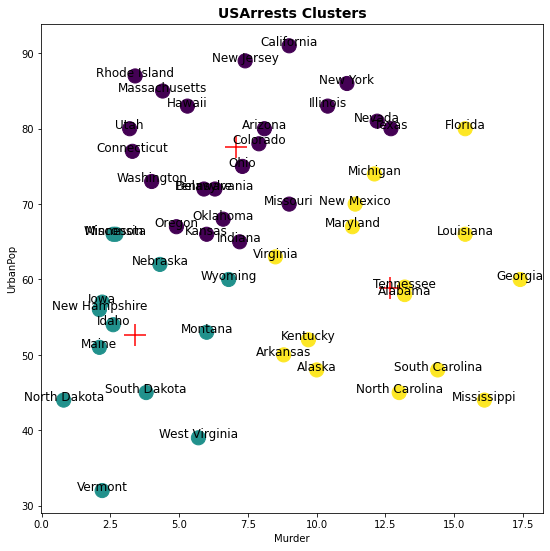

In [ ]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Murder' ,y = 'UrbanPop' , data = df , c = labels , s = 200 )
plt.scatter(x = real_centroids[: , 0] , y =  real_centroids[: , 1] , s = 500 , c = 'red' ,  marker='+')

for line in range(0,df.shape[0]):
  plt.text(df.Murder[line], df.UrbanPop[line], df.index[line],
           horizontalalignment='center',
           size='large',
           color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

## Clustering

Vamos agora empregar todos os quatro atributos de `USArrests` para a clusterização. Mas agora, antes de procedermos a clusterização, vamos verificar o melhor número de clusters que devemos buscar.

In [ ]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

### Definindo o número de Clusters

Aqui, tanto a regra do cotovelo como o valor da silhueta média parecem fornecer o mesmo número de clusters.

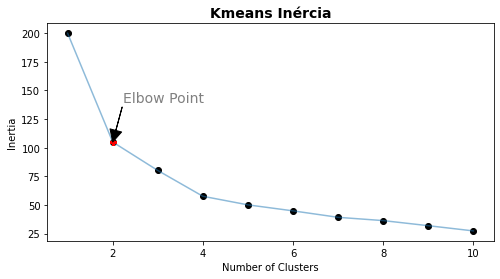

In [ ]:
inertia = inercia(X,1,10)
plt.plot(2 , inertia[1] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (2 , inertia[1]),
            xytext=(10, 40), fontsize=14,
            textcoords='offset points',
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()

In [ ]:
for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.408
Silhueta média para 3 clusters:  0.308
Silhueta média para 4 clusters:  0.34
Silhueta média para 5 clusters:  0.301
Silhueta média para 6 clusters:  0.265
Silhueta média para 7 clusters:  0.3
Silhueta média para 8 clusters:  0.248
Silhueta média para 9 clusters:  0.254
Silhueta média para 10 clusters:  0.251


### Kmédias

Vamos portanto aplicar um estimador Kmédias com k=2.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Configura e instancia o estimador
clf = KMeans(n_clusters = 2 , random_state= 1984)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]
[[-0.67675778 -0.68274685 -0.13306084 -0.57037591]
 [ 1.01513667  1.02412028  0.19959126  0.85556386]]


In [ ]:
df['Cluster'] = labels
print(df.head())

            Murder  Assault  UrbanPop  Rape  Cluster
Alabama       13.2      236        58  21.2        1
Alaska        10.0      263        48  44.5        1
Arizona        8.1      294        80  31.0        1
Arkansas       8.8      190        50  19.5        0
California     9.0      276        91  40.6        1


### Análise: Tamanho dos Clusters

Verifique ainda se os grupos formados não levam a um grupo excessivamente grande (90% dos dados por exemplo) ou pequeno (1% dos dados por exemplos).

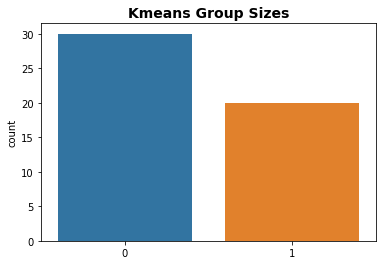

In [ ]:
sns.countplot(x=labels)
plt.title('Kmeans Group Sizes', fontsize=14, weight='bold')
plt.show()

### Análise: Perfil dos Grupos

Esses grupos, diferentemente de um processo de classificação  não são caracterizados por qualquer *rótulo*. Mas você pode explorar esses grupos, por exemplo verificando os valores médios, buscando características comuns para que vocês nomeá-los caracterizando-os melhor. Esses valores são os valores dos próprios centróides (lembrando apenas que os centróides estão normalizados).



In [ ]:
df.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


In [ ]:
scaler.inverse_transform(centroids)

array([[  4.87      , 114.43333333,  63.63333333,  15.94333333],
       [ 12.165     , 255.25      ,  68.4       ,  29.165     ]])

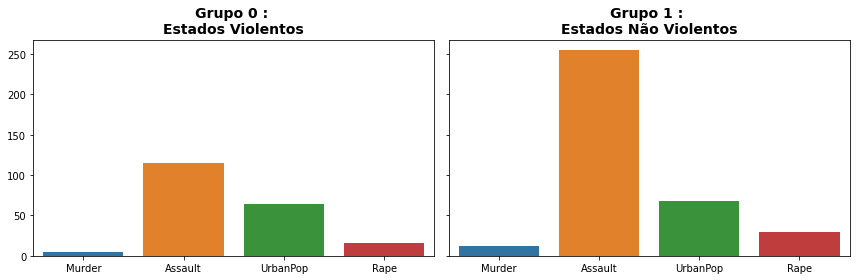

In [ ]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

nomes = ['Estados Violentos','Estados Não Violentos']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



Uma vez que `Assault` é predominante buscar observar os clusters adicionando por exemplo a dimensão `UrbanPop`, embora você deva lembrar que os grupos estarão de fato *separados* apenas nas quatro dimensões. Você não deve, portanto, estranhar encontrar os estado de *Delaware* entre estados de outro grupo no gráfico.

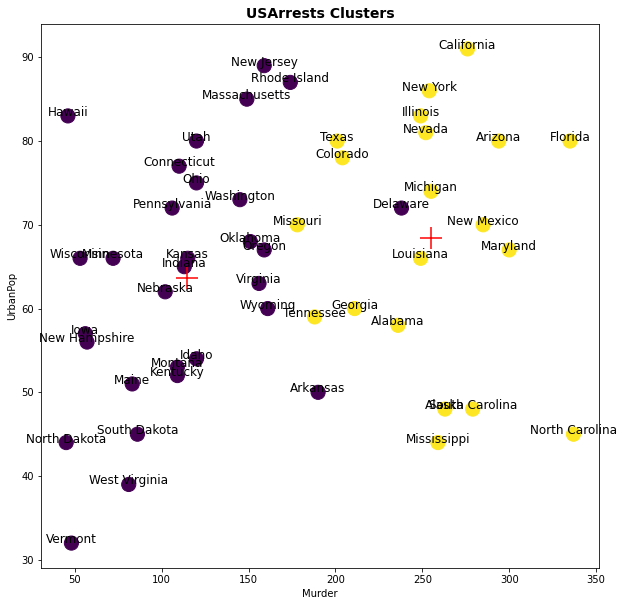

In [ ]:
f = plt.figure(figsize=(10,10))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter( x = 'Assault' ,y = 'UrbanPop' , data = df , c = df.Cluster , s = 200 )
plt.scatter(x = real_centroids[: , 1] , y =  real_centroids[: , 2] , s = 500 , c = 'red' ,  marker='+')

for line in range(0,df.shape[0]):
     plt.text(df.Assault[line], df.UrbanPop[line], df.index[line],
              horizontalalignment='center',
              size='large',
              color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

# Clustering Hierárquico

A ideia da clusterização hierárquica é a mesma do Kmédias. Mas o seu algoritmo parte de princípios bastante diferentes produzindo assim agrupamentos de dados que podem divergir bastante dependendo dos dados.  

A clusterização hierárquica busca construir uma hierarquia de clusters e existem normalmente duas estratégias:

* No *Cluster Aglomerativo* os agrupamentos são feitos de "de baixo para cima", cada amostra começa em seu próprio agrupamento, e pares de agrupamentos são organizados a medida que sobe a hierarquia.

* No *Cluster Divisivo*, a construção é "de cima para baixo", com todas as amostras começam em um cluster, e as divisões são realizadas recursivamente à medida que se desce na hierarquia dos dados.

O resultado do agrupamento hierárquico fornece uma estrutura que organiza os itens de dados em um *dendrograma*.



## Dendograma

A base para a construção do dendograma é uma matriz de distância entre todas as amostras dos dados e a  figura abaixo ilustra o procedimento de construção do Cluster Aglomerativo. Esse foi aqui adaptado de STAT 555 **Statistical Analysis of Genomics Data**. Os itens de dados aparecem no eixo $x$ e as distâncias das amostras no eixo $y$. Na construção Aglomerativa partimos dos elementos individuais (distância $0$) e vamos *lingando* os dados a partir das menores distâncias para as maiores. Assim, o par de amostras $(3,5)$ é o primeiro a ser *ligado*, pois tem a menor distância entre todos os elementos, o $1$ é ligado em seguida e assim por diante até o dendograma ligar todas as amostras dos dados. A construção pode empregar a distância euclidiana mas também qualquer ou métrica de distância.



<img src="http://meusite.mackenzie.br/rogerio/hclust1.png" width=800, align="center">

<small>
<b>
Figura 1. Fases de Construção de um Dendograma a partir de uma Matriz de Distâncias. <br></b>(Fonte:
___. STAT 555 Statistical Analysis of Genomics Data. Lesson 10: Clustering - 10.2).

## Definição  dos Clusters

Construído o Dendograma a definição dos Clusters pode ser feita estabelecendo-se um *ponto de corte* no dendograma, o que define a distância máxima que os elementos terão dentro de um agrupamento.


<img src="http://meusite.mackenzie.br/rogerio/hclust2.png" width=400, align="center">

<small>
<b>
Figura 2. Diferente Clusters são definidos a partir de um ponto de corte da Árvore do Dendograma. <br></b>(Fonte:
___. STAT 555 Statistical Analysis of Genomics Data. Lesson 10: Clustering - 10.2).

A definição do melhor número de clusters é obtido empregando os mesmo métodos do cotovelo ou de média de silhueta que você viu ao estudar o KMédias.

## Linkage

No exemplo acima, quando ligamos o elemento $1$ ao par $(3,5)$ assumimos que a distância da amostra $1$ e do par $(3,5)$ (valor $3$ na matriz) era a menor dentre todas as distâncias da amostra após a ligação do par $(3,5)$. Mas a rigor uma  função distância é definida entre dois elementos de mesmas características e não de um elemento para a um grupo. Na verdade o que empregamos acima de modo intuitivo é o que denominamos *esquema de ligação*  e que permite definir uma 'distância' entre conjuntos de dados. Os esquemas de ligação mais comuns são:

<br>

* $complete\text{_}linkage(A,B) = \{\max \, d (a, b): a \in A, \, b \in B \, \}$

* $single\text{_}linkage(A,B) = \{\min \, d (a, b): a \in A, \, b \in B \, \}$

* $average\text{_}linkage(A,B) = {\displaystyle {\frac {1} {| A | \cdot | B |}} \sum _ {a \in A} \sum _ {b \in B} d (a, b)} $

<br>

> Importante: diferentes métodos de construção (aglomerativo ou divisivo) e diferentes esquemas de ligação produzem diferentes dendogramas e, portanto, irão produzir grupos de dados diferentes na clusterização.

Abaixo os dendogramas produzidos para os esquemas de ligação `single` e `complete` linkage para o mesmo conjunto de dados do nosso exemplo.


<img src="http://meusite.mackenzie.br/rogerio/hclust3.png" width=650, align="center">

<br>
<br>

<small>
<b>
Figura 3. Esquemas de ligação diferentes, produzem Dendogramas e, consequentemente, diferentes Clusters. O dendograma à esquerda é obtido com o <i>single linkage</i>, o da direita, com o <i>complete linkage</i>. <br></b>(Fonte:
___. STAT 555 Statistical Analysis of Genomics Data. Lesson 10: Clustering - 10.2).

# CASO: Wholesale Customer Data

O dataset abaixo traz informações de um distribuidor e seus clientes e inclui os gastos anuais para diferentes produtos.

Fonte: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Queremos aqui, segmentar os fornecedores pelos produtos que oferecem.




In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

## Preparação dos Dados

Como queremos segmentar os fornecedores somente por seus produtos vamos excluir os dados de 'Channel','Region' de nossa análise e como, outros estimadores que empregam distância, vamos normalizar os dados.

In [ ]:
df = df.drop(columns=['Channel','Region'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689],
       [-0.20480553,  0.33406659, -0.29763704, -0.49615501, -0.22813824,
        -0.02622403],
       [ 0.00995035, -0.35231565, -0.10284877, -0.53451222,  0.05428041,
        -0.34785425],
       [-0.34998145, -0.11398095,  0.15535895, -0.28931479,  0.09228619,
         0.36960125],
       [-0.47790091, -0.2914094 , -0.18533618, -0.54585441, -0.2447264 ,
        -0.2750792 ],
       [-0.47449712,  0.7184949 ,  1.1514234 , -0.39448778,  0.95403053,
         0.20346113]])

## Definindo o Número de Clusters

Vamos empregar aqui apenas a técnica de média de silhueta.

In [ ]:
for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.586
Silhueta média para 3 clusters:  0.334
Silhueta média para 4 clusters:  0.353
Silhueta média para 5 clusters:  0.369
Silhueta média para 6 clusters:  0.376
Silhueta média para 7 clusters:  0.294
Silhueta média para 8 clusters:  0.315
Silhueta média para 9 clusters:  0.326
Silhueta média para 10 clusters:  0.312


## Aglomerative Clustering

Aqui vamos aplicar o estimador de clusterização hierárquica construindo a hierarquia de forma aglomerativa.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=2)
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Você pode verificar, os esquemas de ligação `single` e `complete` não levam a bons resultados e empregamos o esquema de ligação padrão do `scikit-learn`.

In [ ]:
df['Cluster'] = labels
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


## Dendograma

Uma das vantagens da clusterização hierárquica e podermos observar diretamente a estrutura dos dados.

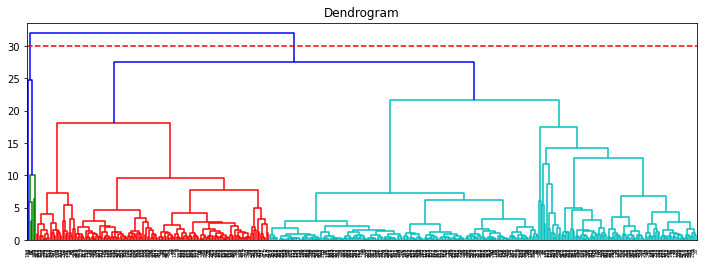

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(12,4),sharey=True)

ax.set_title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
ax.axhline(y=30, color='r', linestyle='--')

plt.show()

Observando o dendograma você pode notar que 2 clusters não parece uma divisão interessante dos dados e o diagrama ainda sugere que 3 clusters teriam mais sentido para nossos dados.

Vamos então refazer a clusterização para 3 clusters.

In [ ]:
clf = AgglomerativeClustering(n_clusters=3)

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[2 2 2 1 1 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 1 2 1 1 2 2 1 2 2 0 2 2 1 2 2 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 2 2 1 2 0 0 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 2 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 0 1
 2 1 2 2 2 1 1 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 2 1 1 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1
 0 1 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1]


In [ ]:
df['Cluster'] = labels
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


### Análise: Tamanho dos Clusters

O grupo pequeno pode ser entendido como dados discrepantes no conjunto das amostras.

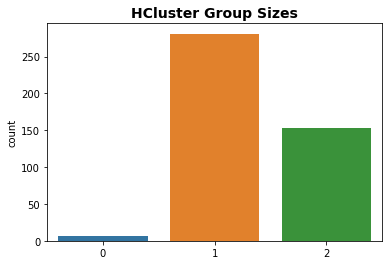

In [ ]:
sns.countplot(x=labels)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

### Análise: Perfil dos Grupos

Observando o perfil dos diferentes fornecedores que nomes você atribuiria a eles?



In [ ]:
df.groupby('Cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,27477.000000,43542.166667,54588.500000,8285.666667,25018.333333,10247.833333
1,15048.932384,3017.298932,3791.761566,3837.316726,758.007117,1309.900356
2,5794.241830,9419.888889,13761.738562,1461.764706,5913.379085,1577.607843


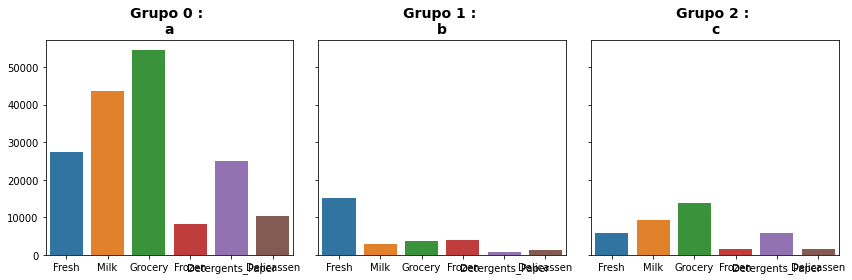

In [ ]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['a','b','c']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



Talvez pudéssemos falar em grupo de *Grandes Fornecedores*, *Pequenos Fornecedores de Produtos Frescos* e *Pequenos Fornecedores de Produtos de Mercearia* e assim, definir estratégias de negócio diferentes para cada segmento!

# Apêndice: O gráfico de silhuetas

Os gráficos apresentam para cada elemento o seu índice de silhueta indicando a maior adequação ou não de cada elemento a cluster. A métrica de silhueta é a média desses valores.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5909041986285453
For n_clusters = 3 The average silhouette_score is : 0.5482872649700601
For n_clusters = 4 The average silhouette_score is : 0.34573629344658097
For n_clusters = 5 The average silhouette_score is : 0.3690403826812808
For n_clusters = 6 The average silhouette_score is : 0.37432403986284685


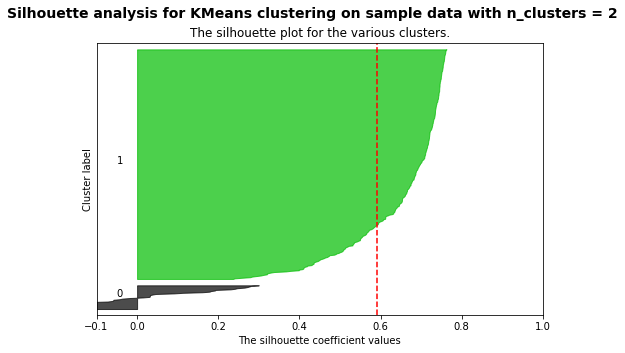

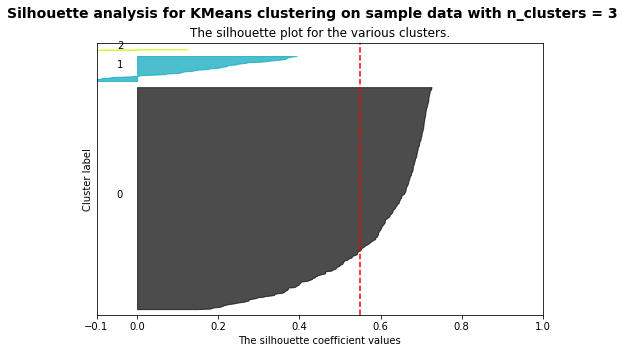

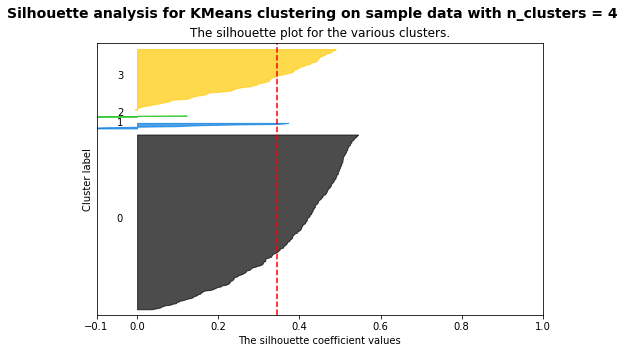

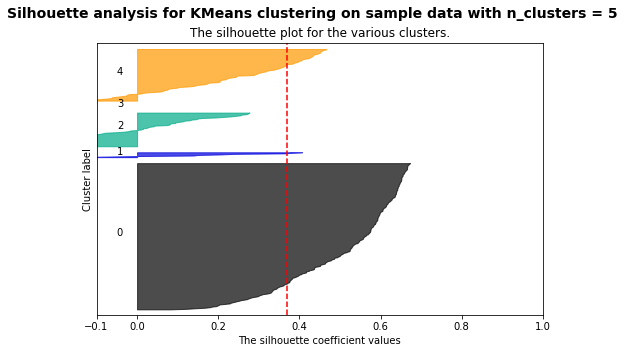

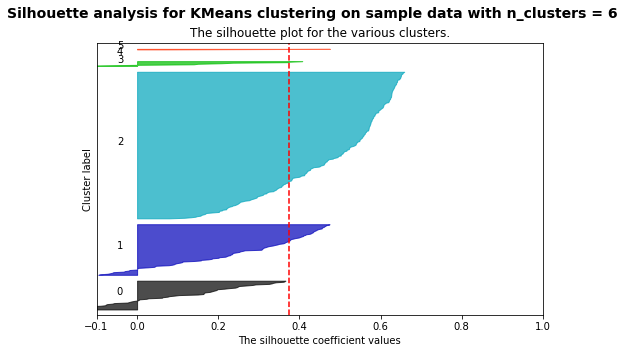

In [ ]:
# you can skip this code!

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = X

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Algumas referências

* Que tal experimentar a clusterização de dados com KMédias e Clusterização Hierárquica e analisar o gráfico do método do cotovelo de forma online sem qualquer programação? Legal não é? Então acesse **Online Statistics Calculator** https://datatab.net/statistics-calculator/cluster. Lá você ainda encontra um exemplo, mas poderá também importar e exportar seus próprios dados.

* Você pode também revisar nosso exemplo em 1D para o KMédias. Ele encontra-se detalhado em Sayad, Saed (2021). **An Introduction to Data Science**, disponível em https://www.saedsayad.com/clustering_kmeans.htm

* ___. STAT 555 **Statistical Analysis of Genomics Data**. Lesson 10: Clustering - 10.2 - Example: Agglomerative Hierarchical Clustering. Disponível em: https://onlinecourses.science.psu.edu/stat555/node/86. Acesso em: 14 de novembro de 2021.

* Entenda um pouco sobre mais uma técnica importante de Clustering, o DBSCAN, acessando **DBSCAN: Density-Based Clustering Essentials** disponível em: http://www.sthda.com/english/wiki/dbscan-density-based-clustering-for-discovering-clusters-in-large-datasets-with-noise-unsupervised-machine-learning


